*Note: This code was a team effort by Group 1.*

# **Mutlilevel Analysis**

In order to perform a multilevel analysis, the Pymer4 tool has been used, as proposed by Jolly (2018).

Reference:
Jolly, (2018). Pymer4: Connecting R and Python for Linear Mixed Modeling. Journal of Open Source Software, 3(31), 862, https://doi.org/10.21105/joss.00862

In [54]:
# import some basic libraries
import os
import pandas as pd


os.environ["R_HOME"] = "/Library/Frameworks/R.framework/Resources"

## **1. Preparing the data**

### 1.1 Combining all the new features with the original dataset

In [55]:
# Reading the main dataset that was created for our project
original_df = pd.read_csv('combined_themepark_dataset.csv')

# Reading the csv files that have been exported from the different hypotheses testing processes, including the new engineered features
H2_data = pd.read_csv('https://raw.githubusercontent.com/crlhbs/Group1_MarketingStrategy/main/02_new%20dataframes/H2_dataframe.csv')
H4_data = pd.read_csv('https://raw.githubusercontent.com/crlhbs/Group1_MarketingStrategy/main/02_new%20dataframes/H4_dataframe.csv')

In [56]:
# Merge the required columns from H2_data to original_df based on 'post_id'
original_df = pd.merge(original_df, H2_data[['post_id', 'post_type']], on='post_id', how='left')

# Display the first few rows of the merged DataFrame
print(original_df.head())

               date                     profile  \
0  12/31/23 9:40 PM  wild adventures theme park   
1  12/31/23 8:01 PM            fun spot america   
2  12/31/23 7:30 PM            fun spot america   
3  12/31/23 7:00 PM            disneyland paris   
4  12/31/23 7:00 PM       silverwood theme park   

                                             message  nr_reactions  \
0  🎟️🚨 Today's the FINAL day to use your 2023 Sea...            16   
1  See you next year! 😉                Don’t miss...            38   
2  Don't miss our HUGE firework display ! 🥳\n\n#f...            23   
3     Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉           646   
4  It's the last day of our New Year's Sale! Save...            17   

   nr_comments  nr_shares  comments/post post_interaction_rate    engagement  \
0            2          2              2              1,09E+12  1.090000e+12   
1            1          2              1              4,17E+11  4.170000e+11   
2            2          3       

In [57]:
original_df.head(3)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,post_type
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,"1,09E+12",1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,66,1
1,12/31/23 8:01 PM,fun spot america,See you next year! 😉 Don’t miss...,38,1,2,1,"4,17E+11",4.170000e+11,33,NaN,NaN,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,100000,3
2,12/31/23 7:30 PM,fun spot america,Don't miss our HUGE firework display ! 🥳\n\n#f...,23,2,3,2,"2,85E+11",2.850000e+11,21,NaN,NaN,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,100000,2


In [58]:
# Merge the required columns from H4_data to original_df based on 'post_id'
original_df = pd.merge(original_df, H4_data[['post_id', 'has_emoji']], on='post_id', how='left')

# Display the first few rows of the merged DataFrame
original_df.head(3)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,post_type,has_emoji
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,"1,09E+12",1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,66,1,1
1,12/31/23 8:01 PM,fun spot america,See you next year! 😉 Don’t miss...,38,1,2,1,"4,17E+11",4.170000e+11,33,NaN,NaN,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,100000,3,1
2,12/31/23 7:30 PM,fun spot america,Don't miss our HUGE firework display ! 🥳\n\n#f...,23,2,3,2,"2,85E+11",2.850000e+11,21,NaN,NaN,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,100000,2,1


In [59]:
original_df

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,post_type,has_emoji
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,"1,09E+12",1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,66,1,1
1,12/31/23 8:01 PM,fun spot america,See you next year! 😉 Don’t miss...,38,1,2,1,"4,17E+11",4.170000e+11,33,NaN,NaN,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,100000,3,1
2,12/31/23 7:30 PM,fun spot america,Don't miss our HUGE firework display ! 🥳\n\n#f...,23,2,3,2,"2,85E+11",2.850000e+11,21,NaN,NaN,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,100000,2,1
3,12/31/23 7:00 PM,disneyland paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646,52,12,56,"1,36E+11",1.360000e+11,478,NaN,1.0,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...,5200000,1,1
4,12/31/23 7:00 PM,silverwood theme park,It's the last day of our New Year's Sale! Save...,17,2,0,2,"4,96E+11",4.960000e+11,16,NaN,NaN,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...,381000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16008,01/01/2023 02:00,wild adventures theme park,LAST CHANCE! \n\nPrices on 2023 Season Passes ...,20,1,0,2,"1,25E+11",1.250000e+11,20,NaN,1.0,NaN,84679583132,84679583132_10159284713193133,https://www.facebook.com/WildAdventures/photos...,66,1,0
16009,01/01/2023 01:20,playland,O Grupo Playcenter e os Parques Playcenter Fam...,7,1,0,1,"2,46E+09",2.460000e+09,7,NaN,1.0,NaN,"1,70866E+14",170865866397863_2401446080006486,https://www.facebook.com/170865866397863/posts...,23000,1,1
16010,01/01/2023 00:01,disneyland paris,Gelukkig 2023! Laat de magie dit jaar stralen ...,833,40,31,44,"1,75E+12",1.750000e+12,621,NaN,NaN,1.0,"6,52389E+14",652389081615295_2176203019233886,https://www.facebook.com/652389081615295/posts...,5200000,2,1
16011,01/01/2023 00:00,six flags over georgia & hurricane harbor,What are your 2023 New Years resolutions? ✨\n\...,58,7,2,9,"1,42E+12",1.420000e+12,49,NaN,1.0,NaN,34284255238,34284255238_10160187479800239,https://www.facebook.com/sixflagsovergeorgia/p...,479000,1,1


# **2. Creating a multi-level model**

### 2.1 Setting up the model with the features from the hypotheses of this project

In [60]:
from pymer4.models import Lmer

# Define the formula for the multilevel regression model
formula = 'engagement ~ post_type + has_emoji + (1|profile)'

# Create an instance of the Lmer model
model = Lmer(formula, data=original_df)

# Fit the model to the data
model.fit()

# Print a summary of the fitted model
print(model.summary())

Linear mixed model fit by REML [’lmerMod’]
Formula: engagement~post_type+has_emoji+(1|profile)

Family: gaussian	 Inference: parametric

Number of observations: 16013	 Groups: {'profile': 59.0}

Log-likelihood: -466076.467 	 AIC: 932162.934

Random effects:

                 Name           Var           Std
profile   (Intercept)  8.980185e+22  2.996696e+11
Residual               1.117505e+24  1.057121e+12

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: engagement~post_type+has_emoji+(1|profile)

Family: gaussian	 Inference: parametric

Number of observations: 16013	 Groups: {'profile': 59.0}

Log-likelihood: -466076.467 	 AIC: 932162.934

Random effects:

                 Name           Var           Std
profile   (Intercept)  8.980185e+22  2.996696e+11
Residual               1.117505e+24  1.057121e+12

No random effect correlations specified

Fixed effects:

                 Estimate        2.5_ci       97.5_ci            S

In [61]:
# Get population level coefficients
print(model.coefs)

                 Estimate        2.5_ci       97.5_ci            SE  \
(Intercept)  8.321277e+11  7.420385e+11  9.222170e+11  4.596474e+10   
post_type   -5.339011e+10 -8.051606e+10 -2.626416e+10  1.384002e+10   
has_emoji   -1.348195e+10 -5.174690e+10  2.478299e+10  1.952329e+10   

                       DF     T-stat         P-val  Sig  
(Intercept)  9.072083e+01  18.103608  7.189332e-32  ***  
post_type    1.802842e+06  -3.857660  1.144817e-04  ***  
has_emoji    1.668420e+05  -0.690557  4.898447e-01       


In [62]:
# Get group level coefficients (just the first 5)
# Each row here is a unique intercept and slope
# which vary because we parameterized our rfx that way above
print(model.fixef.head(5))

                                  (Intercept)     post_type     has_emoji
acn - america's coaster network  1.652403e+11 -5.339011e+10 -1.348195e+10
adventure city                   1.019770e+12 -5.339011e+10 -1.348195e+10
belmont park                     1.049116e+12 -5.339011e+10 -1.348195e+10
big kahuna's nj                  6.706346e+11 -5.339011e+10 -1.348195e+10
busch gardens tampa bay          1.230019e+12 -5.339011e+10 -1.348195e+10


In [63]:
# Get group level deviates from population level coefficients (i.e. rfx)
print(model.ranef.head(5))

                                 X.Intercept.
acn - america's coaster network -6.668874e+11
adventure city                   1.876418e+11
belmont park                     2.169881e+11
big kahuna's nj                 -1.614932e+11
busch gardens tampa bay          3.978912e+11


<Axes: xlabel='Estimate'>

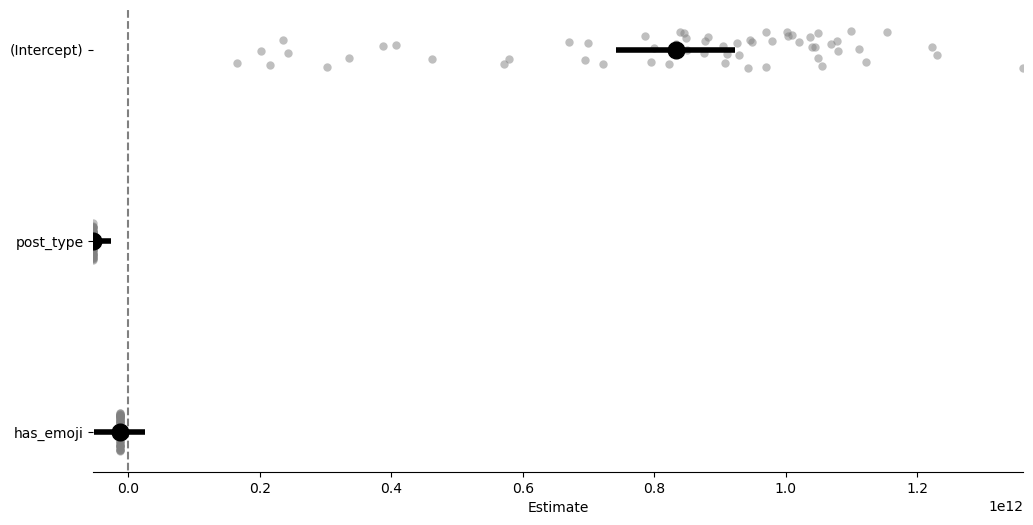

In [64]:
# Visualize coefficients with group/cluster fits overlaid ("forest plot")
model.plot_summary()

<Axes: xlabel='has_emoji', ylabel='predicted engagement'>

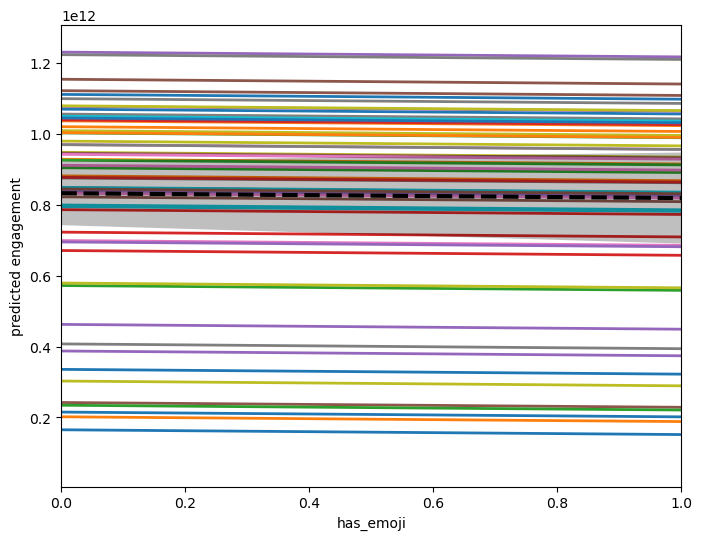

In [65]:
# Plot coefficients for each group/cluster as separate regressions
model.plot("has_emoji", plot_ci=True, ylabel="predicted engagement")

<Axes: xlabel='post_type', ylabel='predicted engagement'>

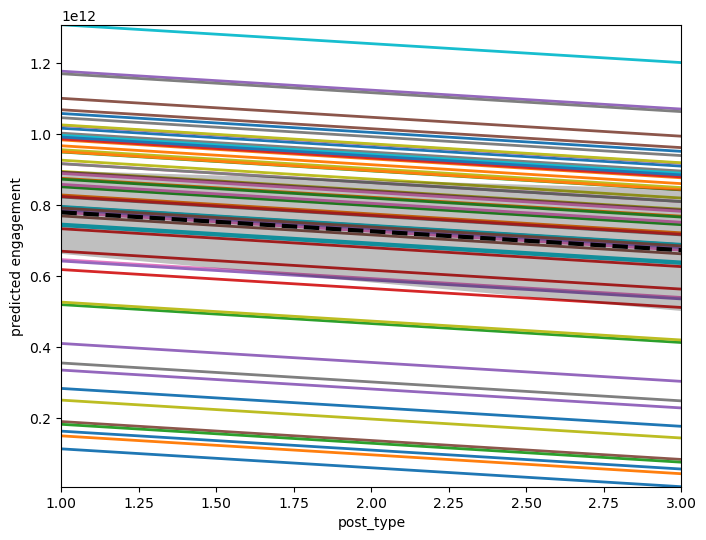

In [66]:
# Plot coefficients for each group/cluster as separate regressions
model.plot("post_type", plot_ci=True, ylabel="predicted engagement")

### 2.2 Interpretation of results

to be done

####
